## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID" )
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
ID_count = combined_df["Mouse ID"].nunique()
ID_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice1 = combined_df.loc[combined_df['Mouse ID'] == "g989"]
dup_mice1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data['Mouse ID'].nunique()
clean_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Create dataframe to hold unique count of mice studied per drug regimen
group_df = clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
# Rename Mouse ID column to Count
group_df = group_df.rename(columns={"Mouse ID": "Count"})
group_df


,Drug Regimen,Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


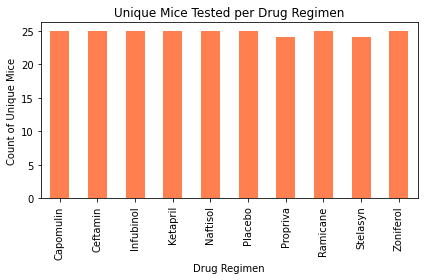

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
group_bar = group_df.plot(kind = 'bar',x = "Drug Regimen", y="Count", title="Unique Mice Tested per Drug Regimen", color = 'coral', legend = False)
group_bar.set_ylabel("Count of Unique Mice")
plt.tight_layout()

plt.savefig("figures/PandaBarChart.png")

plt.show()

In [12]:

drug_df = clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
drug_df = drug_df.rename(columns={"Mouse ID": "Mouse Population"})
drug_df

,Drug Regimen,Mouse Population
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


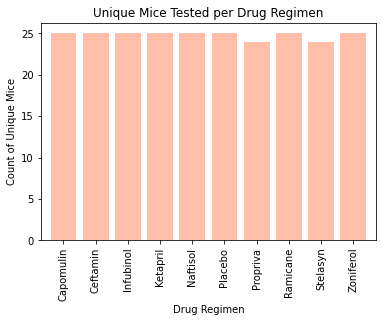

In [13]:


# Create x-axis label count and location
x_axis = np.arange(len(drug_df))
tick_locations = [value for value in x_axis]

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_axis, drug_df["Mouse Population"], color='coral', alpha=0.5, align="center")

# Generate labels for x-axis named by regimen 
plt.xticks(tick_locations, drug_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_df["Mouse Population"])*1.05)

# # Set a Title and labels
plt.title("Unique Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Unique Mice")

# Save the figure
plt.savefig("figures/PyplotBarChart.png")
plt.show()

In [14]:
# Create dataframe to hold unique count of mice studied per gender
gender_df = clean_data.groupby('Sex')['Mouse ID'].nunique().reset_index()
gender_df = gender_df.rename(columns={"Mouse ID": "Gender Population"})
gender_df


,Sex,Gender Population
0,Female,123
1,Male,125


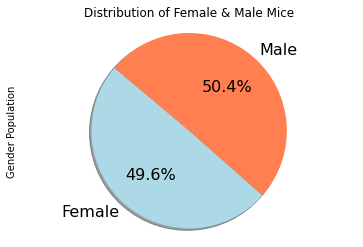

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df.plot(kind = 'pie', y = 'Gender Population', title = "Distribution of Female & Male Mice", startangle=140,
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","coral"],legend =False, labels=gender_df["Sex"])

plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()

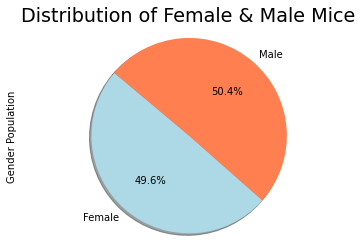

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_df['Sex'].to_list()
populations = gender_df['Gender Population'].to_list()
colors = ["lightblue", "coral"]


plt.pie(populations, labels = genders, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Female & Male Mice")
plt.ylabel("Gender Population")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_df = clean_data[clean_data['Drug Regimen'].isin(treatments)]
treatment_df['Drug Regimen'].value_counts()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Capomulin    230
Ramicane     228
Ceftamin     178
Infubinol    178
Name: Drug Regimen, dtype: int64

In [42]:
last_timepoint = treatment_df.loc[treatment_df.groupby('Mouse ID')['Timepoint'].agg(pd.Series.idxmax)]
sorted_df = last_timepoint.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_timepoint = last_timepoint.set_index('Drug Regimen')
last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Infubinol,a203,45,67.973419,2,Female,20,23
Infubinol,a251,45,65.525743,1,Female,21,25
Ceftamin,a275,45,62.999356,3,Female,20,28
Ramicane,a411,45,38.407618,1,Male,3,22
Ramicane,a444,45,43.047543,0,Female,10,25


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Create dataframe for data specific to drug regimen Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [19]:
# From Capomulin dataframe, create dataframe limited to single Mouse ID
mouse_cap = capomulin_df.loc[capomulin_df['Mouse ID']=="b128"]
mouse_cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [20]:
# Create dataframe containing only time point and tumor volume for single Mouse ID
single_mouse= mouse_cap.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
single_mouse

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.651331
2,10,43.270852
3,15,43.784893
4,20,42.731552
5,25,43.262145
6,30,40.605335
7,35,37.967644
8,40,38.379726
9,45,38.982878


In [21]:
# Create list of timepoint values for plot x-axis
x_axis = single_mouse['Timepoint'].to_list()
x_axis

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [22]:
# Create list of tumor volume values for line plot y-axis
volume=single_mouse['Tumor Volume (mm3)'].to_list()
volume

[45.0,
 45.65133131,
 43.2708519,
 43.78489343,
 42.731552,
 43.26214483,
 40.60533486,
 37.96764437,
 38.3797259,
 38.98287774]

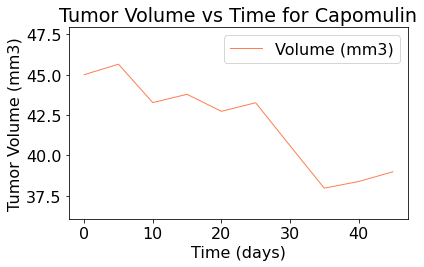

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
test_mouse,= plt.plot(x_axis, single_mouse['Tumor Volume (mm3)'], color="coral", linewidth=1, label="Volume (mm3)")
plt.legend(handles=[test_mouse], loc="best")
plt.title("Tumor Volume vs Time for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(min(x_axis)-max(x_axis)*0.05, max(x_axis)*1.05)
plt.ylim(min(single_mouse['Tumor Volume (mm3)'])*0.95, max(single_mouse['Tumor Volume (mm3)'])*1.05)
plt.tight_layout()
plt.savefig("figures/LineChart.png")
plt.show()

In [24]:
# From Capomulin dataframe, create dataframe for weight and tumor volume of each Mouse ID
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,b128,22,45.651331
2,b128,22,43.270852
3,b128,22,43.784893
4,b128,22,42.731552


In [25]:
# Create dataframe grouped by mouse ID and weight, giving the tumor volume average for each Mouse ID
avg_cap = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename column Tumor Volume to Average Volume
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)"})

# Set index for dataframe to Mouse ID
avg_cap=avg_cap.set_index('Mouse ID')
avg_cap.head()

,Weight (g),Average Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


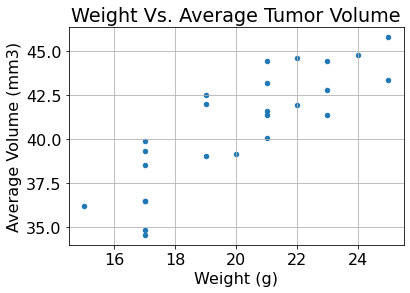

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume (mm3)", grid=True,
              title="Weight Vs. Average Tumor Volume")
plt.savefig("figures/ScatterPlot.png")
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create variables for mouse weight and average tumor volume data from average capomulin dataframe
mouse_weight = avg_cap.iloc[:,0]
avg_tumor_volume = avg_cap.iloc[:,1]

# Calculate and print correlation coefficient
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume (mm3) is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume (mm3) is 0.84


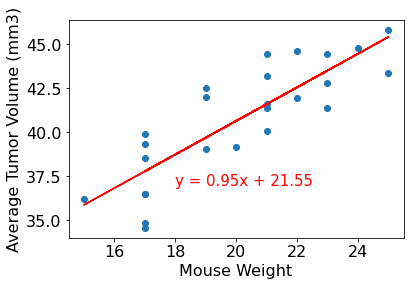

In [32]:
# Calculate and plot liner regression model to scatter plot for Weight vs Volume

x_values = avg_cap['Weight (g)']
y_values = avg_cap['Average Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("figures/LinearRegression.png")
plt.show()